In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


In [2]:

#1 Garante que a pasta data/processed existe
processed_dir = Path("data") / "processed"
processed_dir.mkdir(parents=True, exist_ok=True)

#2 Deixa os números aleatórios reprodutíveis
np.random.seed(42)

#3 Cria um DataFrame simples só para teste
df = pd.DataFrame(
    {
        "id": np.arange(1, 11),
        "feature_1": np.random.randn(10),
        "feature_2": np.random.randint(0, 100, size=10),
    }
)

df  # mostra o DataFrame

,id,feature_1,feature_2
0,1,0.496714,63
1,2,-0.138264,59
2,3,0.647689,20
3,4,1.523030,32
4,5,-0.234153,75
5,6,-0.234137,57
6,7,1.579213,21
7,8,0.767435,88
8,9,-0.469474,48
9,10,0.542560,90


In [3]:
# Caminho do arquivo Parquet
parquet_path = processed_dir / "test.parquet"

# Salva o DataFrame em Parquet
df.to_parquet(parquet_path, index=False)
print(f"Arquivo salvo em: {parquet_path}")

# Lê de volta para conferir
df_loaded = pd.read_parquet(parquet_path)
df_loaded


Arquivo salvo em: data\processed\test.parquet


,id,feature_1,feature_2
0,1,0.496714,63
1,2,-0.138264,59
2,3,0.647689,20
3,4,1.523030,32
4,5,-0.234153,75
5,6,-0.234137,57
6,7,1.579213,21
7,8,0.767435,88
8,9,-0.469474,48
9,10,0.542560,90


In [4]:
import matplotlib.pyplot as plt

# Cria uma série temporal simulada
dates = pd.date_range(start="2025-01-01", periods=10, freq="D")
ts_df = pd.DataFrame(
    {
        "date": dates,
        "value": np.random.randn(10).cumsum(),   # soma acumulada para parecer mais "curva"
    }
)

ts_df


,date,value
0,2025-01-01,-1.012831
1,2025-01-02,-0.698584
2,2025-01-03,-1.606608
3,2025-01-04,-3.018912
4,2025-01-05,-1.553263
5,2025-01-06,-1.779039
6,2025-01-07,-1.711511
7,2025-01-08,-3.136259
8,2025-01-09,-3.680642
9,2025-01-10,-3.569719


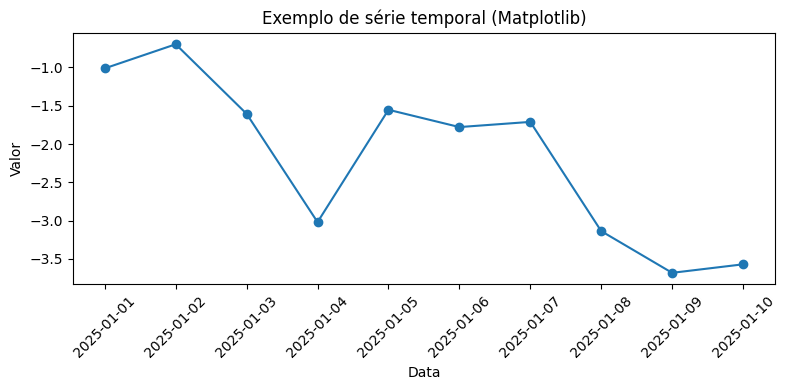

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(ts_df["date"], ts_df["value"], marker="o")
plt.title("Exemplo de série temporal (Matplotlib)")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
import plotly.express as px

fig = px.scatter(
    df,  # o DataFrame que criamos antes
    x="feature_1",
    y="feature_2",
    title="Scatter interativo com plotly",
)
fig

In [7]:
# A célula de import do sklearn já está no começo do notebook

X, y = make_classification(
    n_samples=1000,      # 1000 linhas (registros)
    n_features=4,        # 4 variáveis de entrada
    n_informative=2,     # 2 de fato carregam informação
    n_redundant=0,       # nenhuma é combinação linear das outras
    n_clusters_per_class=1,
    random_state=42,     # reprodutível
)

X.shape, y.shape

((1000, 4), (1000,))

In [8]:
# Separa em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,   # mantém a proporção de classes
)

# Cria o modelo de regressão logística
log_reg = LogisticRegression(max_iter=1000)

# Treina o modelo
log_reg.fit(X_train, y_train)

# Faz previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Calcula acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.3f}")


Acurácia no conjunto de teste: 0.900
